<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Знакомство-с-данными" data-toc-modified-id="Знакомство-с-данными-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Знакомство с данными</a></span></li><li><span><a href="#Изменение-данных-и-заполнение-пропусков" data-toc-modified-id="Изменение-данных-и-заполнение-пропусков-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Изменение данных и заполнение пропусков</a></span></li><li><span><a href="#Изменение-количественных-и-категориальных-признаков" data-toc-modified-id="Изменение-количественных-и-категориальных-признаков-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Изменение количественных и категориальных признаков</a></span></li></ul></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span><ul class="toc-item"><li><span><a href="#Случайный-лес" data-toc-modified-id="Случайный-лес-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Случайный лес</a></span></li><li><span><a href="#Решающее-дерево" data-toc-modified-id="Решающее-дерево-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Решающее дерево</a></span></li><li><span><a href="#Логистическая-регрессия" data-toc-modified-id="Логистическая-регрессия-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Логистическая регрессия</a></span></li></ul></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span><strong>Вывод</strong></a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

**Описание данных**

1. Данные находятся в файле /datasets/Churn.csv (англ. «отток клиентов»)
2. Признаки:
    - RowNumber — индекс строки в данных
    - CustomerId — уникальный идентификатор клиента
    - Surname — фамилия
    - CreditScore — кредитный рейтинг
    - Geography — страна проживания
    - Gender — пол
    - Age — возраст
    - Tenure — сколько лет человек является клиентом банка
    - Balance — баланс на счёте
    - NumOfProducts — количество продуктов банка, используемых клиентом
    - HasCrCard — наличие кредитной карты
    - IsActiveMember — активность клиента
    - EstimatedSalary — предполагаемая зарплата
3. Целевой признак
    - Exited — факт ухода клиента

## Подготовка данных

In [1]:
#Необохидымые библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score, roc_curve, roc_auc_score
from sklearn.utils import shuffle

### Знакомство с данными

In [2]:
df = pd.read_csv('Churn.csv')
display(df.head())

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


Для начала взглянем на типы данных в датафрейме

In [3]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure             float64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [4]:
#Посмотрим на значения, которые встречаются в Tenure
df['Tenure'].value_counts()

1.0     952
2.0     950
8.0     933
3.0     928
5.0     927
7.0     925
4.0     885
9.0     882
6.0     881
10.0    446
0.0     382
Name: Tenure, dtype: int64

In [5]:
#Взглянем на корреляцию, чтобы найти взаимозаменяющие столбцы
df.corr()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,1.000000,0.004202,0.005840,0.000783,-0.007322,-0.009067,0.007246,0.000599,0.012044,-0.005988,-0.016571
CustomerId,0.004202,1.000000,0.005308,0.009497,-0.021418,-0.012419,0.016972,-0.014025,0.001665,0.015271,-0.006248
CreditScore,0.005840,0.005308,1.000000,-0.003965,-0.000062,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,0.000783,0.009497,-0.003965,1.000000,-0.013134,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,-0.007322,-0.021418,-0.000062,-0.013134,1.000000,-0.007911,0.011979,0.027232,-0.032178,0.010520,-0.016761
Balance,-0.009067,-0.012419,0.006268,0.028308,-0.007911,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.007246,0.016972,0.012238,-0.030680,0.011979,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,0.000599,-0.014025,-0.005458,-0.011721,0.027232,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.012044,0.001665,0.025651,0.085472,-0.032178,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.005988,0.015271,-0.001384,-0.007201,0.010520,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097


In [6]:
# Проверим на дубликаты
df_obj_col = ['Surname','Geography','Gender']
for col in df_obj_col:#Приведем все object столбцы к нижнему регистру
    df[col] = df[col].str.lower()
df.duplicated().sum()

0

In [7]:
# Проверим на пропуски
df.isna().sum()

RowNumber            0
CustomerId           0
Surname              0
CreditScore          0
Geography            0
Gender               0
Age                  0
Tenure             909
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Exited               0
dtype: int64

In [8]:
# Взглянем на количественные данные
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,9091.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,4.997690,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.894723,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,2.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


**Вывод**

Критических проблем в данных нет, но необходимо:  
1. Изменить тип данных в стобце Tenure с float на int
2. Заполнить пропуски в Tenure
3. Переведем категориальные в дамми-признаки
4. Масштабируем количественные признаки

### Изменение данных и заполнение пропусков

Для начала заполним пропуски.  
Взглянем нет ли зависимостей в строках с пропущенными значениями

In [9]:
df[df['Tenure'].isna()]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
30,31,15589475,azikiwe,591,spain,female,39,NaN,0.00,3,1,0,140469.38,1
48,49,15766205,yin,550,germany,male,38,NaN,103391.38,1,0,1,90878.13,0
51,52,15768193,trevisani,585,germany,male,36,NaN,146050.97,2,0,0,86424.57,0
53,54,15702298,parkhill,655,germany,male,41,NaN,125561.97,1,0,0,164040.94,1
60,61,15651280,hunter,742,germany,male,35,NaN,136857.00,1,0,0,84509.57,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9944,9945,15703923,cameron,744,germany,male,41,NaN,190409.34,2,1,1,138361.48,0
9956,9957,15707861,nucci,520,france,female,46,NaN,85216.61,1,1,0,117369.52,1
9964,9965,15642785,douglas,479,france,male,34,NaN,117593.48,2,0,0,113308.29,0
9985,9986,15586914,nepean,659,france,male,36,NaN,123841.49,2,1,0,96833.00,0


Заменим пропущенные значения медианой в зависимости от возраста.

In [10]:
df['Tenure'] = df.groupby('Age')['Tenure'].transform(lambda group : group.fillna(group.mean()))

In [11]:
#Изменим тип данных
df['Tenure'] = df['Tenure'].astype('int')

### Изменение количественных и категориальных признаков

Так как столбцы RowNumber, CastomerId, Surname являются малозначительными при прогнозировании, то я уберу их из нашего датафрейма

In [12]:
# Перевод категориальных в дамми признаки
# Эту операцию необходимо провести со столбцами Geography и Gender
df_ohe = pd.get_dummies(df.drop(['RowNumber', 'CustomerId', 'Surname'] , axis=1), columns=['Geography','Gender'], drop_first=True)
df_ohe

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_germany,Geography_spain,Gender_male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,1,0,1


Количественные признаки будем масштабировать после определения признаков с нормальным распределением и разделения данных на выборки

## Исследование задачи

Оценим соотношение классов.

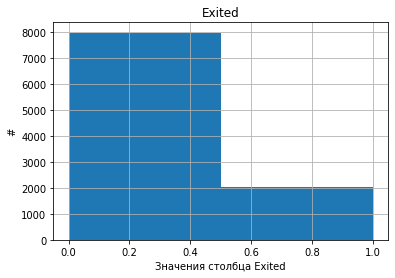

In [13]:
df['Exited'].hist(bins=2)
plt.title('Exited')
plt.xlabel('Значения столбца Exited')
plt.ylabel('#')
plt.show()

In [14]:
rep = df[df['Exited']==0]['Exited'].count()/df[df['Exited']==1]['Exited'].count()
print(f'Значений "0" в {rep} больше, чем "1"')

Значений "0" в 3.9091801669121256 больше, чем "1"


Ушло порядка 20% клиентов, а тех что осталось в 4 раза больше

Обучим 3 вида модели без обработки:  
1. Разделим данные на тренировочную, валидационную и тестовую выборки
2. Проверим модели:
 - Решающие дерево
 - Случайный лес
 - Логистическая регрессия
3. Проверим качество f1-метрикой

In [15]:
# Разделение на выборки
target = df_ohe['Exited']
features = df_ohe.drop(['Exited'] , axis=1)

features_train, features_valid, target_train, target_valid = train_test_split(features, target, test_size=0.2, random_state=16011999)#Создаю тренировочную и валидационную выборки
features_train, features_test, target_train, target_test = train_test_split(features_train, target_train, test_size=0.25, random_state=16011999)#Создаю тестовую выборку
print(features_train.shape)
print(features_valid.shape)
print(features_test.shape)

(6000, 11)
(2000, 11)
(2000, 11)


In [16]:
# Масштабируем количественные признаки
numeric = ['Balance', 'NumOfProducts', 'EstimatedSalary', 'CreditScore', 'Age', 'Tenure'] # Все количественные признаки
scaler = StandardScaler()
scaler.fit(features_train[numeric])
features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])

In [17]:
#Обучение решающего дерева
best_f1_tree = 0
best_accuracy_tree = 0
for depth in range(1,30):#Проходим циклом по глубинам от 1 до 30
    model_tree = DecisionTreeClassifier(random_state=16011999, max_depth=depth)
    model_tree.fit(features_train,target_train)#Обучаем на тренировочных данных
    pred_tree = model_tree.predict(features_valid)
    accuracy_valid = accuracy_score(target_valid,pred_tree)#Проверяем на валидационных
    f1_tree = f1_score(target_valid,pred_tree)
    if best_f1_tree < f1_tree:#Условие для сохранения данных по лучшей модели
        best_f1_tree = f1_tree
        best_accuracy_tree = accuracy_valid
        best_depth = depth
        best_model_tree = model_tree
        probabilities_tree = model_tree.predict_proba(features_valid)[:,1]
        auc_roc_tree = roc_auc_score(target_valid, probabilities_tree)
        


print(f'Показатель F1: {best_f1_tree}')       
print(f'AUC-ROC: {auc_roc_tree}')
print(f'Показатель accuracy: {best_accuracy_tree}')
print(f'При глубине: {best_depth}')

Показатель F1: 0.5769230769230769
AUC-ROC: 0.8166217764017395
Показатель accuracy: 0.846
При глубине: 5


In [18]:
#Обучение случайного леса
best_accuracy_forest = 0
best_f1_forest = 0
for estimator in range(10,210,10):
    model_forest = RandomForestClassifier(random_state=16011999, n_estimators=estimator)
    model_forest.fit(features_train,target_train)
    pred_forest = model_forest.predict(features_valid)
    accuracy = accuracy_score(target_valid,pred_forest)
    f1_score_forest = f1_score(target_valid, pred_forest)
    if best_f1_forest < f1_score_forest:
        best_accuracy_forest = accuracy
        best_estimator = estimator
        best_model_forest = model_forest
        best_f1_forest = f1_score_forest
        probabilities_forest = model_forest.predict_proba(features_valid)[:,1]
        auc_roc_forest = roc_auc_score(target_valid, probabilities_forest)

print(f'Показатель F1: {best_f1_forest}')
print(f'AUC-ROC: {auc_roc_forest}')
print(f'Показатель accuracy: {best_accuracy_forest}')
print(f'При количестве деревьев: {best_estimator}')

Показатель F1: 0.575107296137339
AUC-ROC: 0.8325145706939647
Показатель accuracy: 0.8515
При количестве деревьев: 90


In [19]:
#Обучение логистической регрессии
model_log = LogisticRegression(random_state=16011999)
model_log.fit(features_train, target_train)
pred_log = model_log.predict(features_valid)
accuracy_log = accuracy_score(target_valid, pred_log)
f1_log = f1_score(target_valid, pred_log)
probabilities_log = model_log.predict_proba(features_valid)[:,1]
auc_roc_log = roc_auc_score(target_valid, probabilities_log)

print(f'Показатель accuracy: {accuracy_log}')
print(f'Показатель F1: {f1_log}')
print(f'AUC-ROC: {auc_roc_log}')

Показатель accuracy: 0.7985
Показатель F1: 0.3111111111111111
AUC-ROC: 0.7506383067571034


**Вывод**

На необработанных данных самой эффективной моделью оказался "Случайный лес".  
Он показал самый высокие показатели метрик качества: accuracy и f1_score

## Борьба с дисбалансом

В данном блоке избавимся от дисбаланса и взглянем на изменение f1-метрики и AUC-ROC

Существуют несколько способов борьбы с дисбалансом:
- Строить модель учитывая вес каждого класса
- Upsampling (увеличить количество меньшего класса)
- Downsampling (уменьшить количество большего класса)

Так как самой эффективной моделью был "Случайны лес", то его мы и будем использовать с теми параметрами, которые показали максимальное значение accuracy и f1_score

### Случайный лес

In [20]:
#Взвешивание классов
best_accuracy_weight = 0
best_f1_weight = 0
for estimator in range(10,210,10):
    model_weight_forest = RandomForestClassifier(random_state=16011999, n_estimators=estimator, class_weight='balanced')
    model_weight_forest.fit(features_train,target_train)
    pred_forest = model_weight_forest.predict(features_valid)
    accuracy = accuracy_score(target_valid,pred_forest)
    f1_score_weight = f1_score(target_valid, pred_forest)
    if best_f1_weight < f1_score_weight:
        best_accuracy_weight = accuracy
        best_estimator_weight = estimator
        best_model_weight = model_weight_forest
        best_f1_weight = f1_score_weight
        probabilities_weight = model_weight_forest.predict_proba(features_valid)[:,1]
        auc_roc_weight = roc_auc_score(target_valid, probabilities_weight)

print('Взвешивание классов')        
print(f'Показатель F1: {best_f1_weight}')
print(f'AUC-ROC: {auc_roc_weight}')
print(f'Показатель accuracy: {best_accuracy_weight}')
print(f'При количестве деревьев: {best_estimator_weight}')

Взвешивание классов
Показатель F1: 0.563049853372434
AUC-ROC: 0.8325854108130356
Показатель accuracy: 0.851
При количестве деревьев: 100


In [21]:
#Upsampling
def upsample(features, target, repeat):

    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]
    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    features_upsampled, target_upsampled = shuffle(features_upsampled, target_upsampled, random_state=12345)
    return features_upsampled, target_upsampled

features_upsample, target_upsample = upsample(features_train, target_train, 4)

In [22]:
best_accuracy_upsample = 0
best_f1_upsample = 0
for estimator in range(10,210,10):
    model_upsample_forest = RandomForestClassifier(random_state=16011999, n_estimators=estimator)
    model_upsample_forest.fit(features_upsample, target_upsample)
    pred_upsample = model_upsample_forest.predict(features_valid)
    accuracy = accuracy_score(target_valid,pred_upsample)
    f1_score_upsample = f1_score(target_valid, pred_upsample)
    if best_f1_upsample < f1_score_upsample:
        best_accuracy_upsample = accuracy
        best_estimator_upsample = estimator
        best_model_upsample = model_upsample_forest
        best_f1_upsample = f1_score_upsample
        probabilities_upsample = model_upsample_forest.predict_proba(features_valid)[:,1]
        auc_roc_upsample = roc_auc_score(target_valid, probabilities_upsample)

print('При увеличении меньшего класса в 4 раза')        
print(f'Показатель F1: {best_f1_upsample}')
print(f'AUC-ROC: {auc_roc_upsample}')
print(f'Показатель accuracy: {best_accuracy_upsample}')
print(f'При количестве деревьев: {best_estimator_upsample}')

При увеличении меньшего класса в 4 раза
Показатель F1: 0.618556701030928
AUC-ROC: 0.8278137695295023
Показатель accuracy: 0.852
При количестве деревьев: 60


In [23]:
#Downsampling
#Возьмем 40% от большего класса, чтобы уравнять их
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat([features_zeros.sample(frac=fraction, random_state=12345)]+[features_ones])
    target_downsampled = pd.concat([target_zeros.sample(frac=fraction, random_state=12345)]+[target_ones])
    features_downsampled, target_downsampled = shuffle(features_downsampled, target_downsampled, random_state=12345)
    return features_downsampled, target_downsampled
features_downsample, target_downsample = downsample(features_train, target_train, 0.25)

In [24]:
best_accuracy_downsample = 0
best_f1_downsample = 0
for estimator in range(10,210,10):
    model_downsample_forest = RandomForestClassifier(random_state=16011999, n_estimators=estimator)
    model_downsample_forest.fit(features_downsample, target_downsample)
    pred_downsample = model_downsample_forest.predict(features_valid)
    accuracy = accuracy_score(target_valid,pred_downsample)
    f1_score_downsample = f1_score(target_valid, pred_downsample)
    if best_f1_downsample < f1_score_downsample:
        best_accuracy_downsample = accuracy
        best_estimator_downsample = estimator
        best_model_downsample = model_downsample_forest
        best_f1_downsample = f1_score_downsample
        probabilities_downsample = model_downsample_forest.predict_proba(features_valid)[:,1]
        auc_roc_downsample = roc_auc_score(target_valid, probabilities_downsample)

print('При уменьшении большего класса в 4 раза')        
print(f'Показатель F1: {best_f1_downsample}')
print(f'AUC-ROC: {auc_roc_downsample}')
print(f'Показатель accuracy: {best_accuracy_downsample}')
print(f'При количестве деревьев: {best_estimator_downsample}')

При уменьшении большего класса в 4 раза
Показатель F1: 0.5866916588566072
AUC-ROC: 0.8381870000178963
Показатель accuracy: 0.7795
При количестве деревьев: 120


### Решающее дерево

In [25]:
# Взвешивание классов
best_f1_tree_weight = 0
best_accuracy_tree_weight = 0
for depth in range(1,30):#Проходим циклом по глубинам от 1 до 30
    model_weight_tree = DecisionTreeClassifier(random_state=16011999, max_depth=depth, class_weight='balanced')
    model_weight_tree.fit(features_train,target_train)#Обучаем на тренировочных данных
    pred_tree = model_weight_tree.predict(features_valid)
    accuracy_valid = accuracy_score(target_valid,pred_tree)#Проверяем на валидационных
    f1_tree_weight = f1_score(target_valid,pred_tree)
    if best_f1_tree_weight < f1_tree_weight:#Условие для сохранения данных по лучшей модели
        best_f1_tree_weight = f1_tree_weight
        best_accuracy_tree_weight = accuracy_valid
        best_depth_weight = depth
        best_model_tree_weight = model_weight_tree
        probabilities_tree_weight = model_weight_tree.predict_proba(features_valid)[:,1]
        auc_roc_tree_weight = roc_auc_score(target_valid, probabilities_tree_weight)
        


print(f'Показатель F1: {best_f1_tree_weight}')       
print(f'AUC-ROC: {auc_roc_tree_weight}')
print(f'Показатель accuracy: {best_accuracy_tree_weight}')
print(f'При глубине: {best_depth_weight}')

Показатель F1: 0.5641921397379913
AUC-ROC: 0.8214001288544482
Показатель accuracy: 0.7505
При глубине: 6


In [26]:
#Upsample
best_f1_tree_upsample = 0
best_accuracy_tree_upsample = 0
for depth in range(1,30):
    model_upsample_tree = DecisionTreeClassifier(random_state=16011999, max_depth=depth)
    model_upsample_tree.fit(features_upsample,target_upsample)
    pred_tree = model_upsample_tree.predict(features_valid)
    accuracy_valid = accuracy_score(target_valid,pred_tree)
    f1_tree_upsample = f1_score(target_valid,pred_tree)
    if best_f1_tree_upsample < f1_tree_upsample:
        best_f1_tree_upsample = f1_tree_upsample
        best_accuracy_tree_upsample = accuracy_valid
        best_depth_upsample = depth
        best_model_tree_upsample = model_upsample_tree
        probabilities_tree_upsample = model_upsample_tree.predict_proba(features_valid)[:,1]
        auc_roc_tree_upsample = roc_auc_score(target_valid, probabilities_tree_upsample)
        
print(f'Показатель F1: {best_f1_tree_upsample}')       
print(f'AUC-ROC: {auc_roc_tree_upsample}')
print(f'Показатель accuracy: {best_accuracy_tree_upsample}')
print(f'При глубине: {best_depth_upsample}')

Показатель F1: 0.5641921397379913
AUC-ROC: 0.8214001288544482
Показатель accuracy: 0.7505
При глубине: 6


In [27]:
#Downsample
best_f1_tree_downsample = 0
best_accuracy_tree_downsample = 0
for depth in range(1,30):
    model_downsample_tree = DecisionTreeClassifier(random_state=16011999, max_depth=depth)
    model_downsample_tree.fit(features_downsample,target_downsample)
    pred_tree = model_downsample_tree.predict(features_valid)
    accuracy_valid = accuracy_score(target_valid,pred_tree)
    f1_tree_downsample = f1_score(target_valid,pred_tree)
    if best_f1_tree_downsample < f1_tree_downsample:
        best_f1_tree_downsample = f1_tree_downsample
        best_accuracy_tree_downsample = accuracy_valid
        best_depth_downsample = depth
        best_model_tree_downsample = model_downsample_tree
        probabilities_tree_downsample = model_downsample_tree.predict_proba(features_valid)[:,1]
        auc_roc_tree_downsample = roc_auc_score(target_valid, probabilities_tree_downsample)
        
print(f'Показатель F1: {best_f1_tree_downsample}')       
print(f'AUC-ROC: {auc_roc_tree_downsample}')
print(f'Показатель accuracy: {best_accuracy_tree_downsample}')
print(f'При глубине: {best_depth_downsample}')

Показатель F1: 0.5591200733272227
AUC-ROC: 0.7897785910720572
Показатель accuracy: 0.7595
При глубине: 8


### Логистическая регрессия

In [28]:
# Взвешевание классов
model_log_weight = LogisticRegression(random_state=16011999, class_weight='balanced')
model_log_weight.fit(features_train, target_train)
pred_log = model_log_weight.predict(features_valid)
accuracy_log_weight = accuracy_score(target_valid, pred_log)
f1_log_weight = f1_score(target_valid, pred_log)
probabilities_log_weight = model_log.predict_proba(features_valid)[:,1]
auc_roc_log_weight = roc_auc_score(target_valid, probabilities_log)

print(f'Показатель accuracy: {accuracy_log_weight}')
print(f'Показатель F1: {f1_log_weight}')
print(f'AUC-ROC: {auc_roc_log_weight}')

Показатель accuracy: 0.696
Показатель F1: 0.4873524451939291
AUC-ROC: 0.7506383067571034


In [29]:
# Upsample
model_log_upsample = LogisticRegression(random_state=16011999)
model_log_upsample.fit(features_upsample, target_upsample)
pred_log_upsample = model_log_upsample.predict(features_valid)
accuracy_log_upsample = accuracy_score(target_valid, pred_log_upsample)
f1_log_upsample = f1_score(target_valid, pred_log_upsample)
probabilities_log_upsample = model_log_upsample.predict_proba(features_valid)[:,1]
auc_roc_log_upsample = roc_auc_score(target_valid, probabilities_log_upsample)

print(f'Показатель accuracy: {accuracy_log_upsample}')
print(f'Показатель F1: {f1_log_upsample}')
print(f'AUC-ROC: {auc_roc_log_upsample}')

Показатель accuracy: 0.6965
Показатель F1: 0.48776371308016875
AUC-ROC: 0.7537329014323126


In [30]:
# Downsample
model_log_downsample = LogisticRegression(random_state=16011999)
model_log_downsample.fit(features_downsample, target_downsample)
pred_log_downsample = model_log_downsample.predict(features_valid)
accuracy_log_downsample = accuracy_score(target_valid, pred_log_downsample)
f1_log_downsample = f1_score(target_valid, pred_log_downsample)
probabilities_log_downsample = model_log_downsample.predict_proba(features_valid)[:,1]
auc_roc_log_downsample = roc_auc_score(target_valid, probabilities_log_downsample)

print(f'Показатель accuracy: {accuracy_log_downsample}')
print(f'Показатель F1: {f1_log_downsample}')
print(f'AUC-ROC: {auc_roc_log_downsample}')

Показатель accuracy: 0.6955
Показатель F1: 0.485207100591716
AUC-ROC: 0.753167671850672


**Вывод**

Из всех моделей и способов борьбы с дисбалансом самая эффективная оказался "Случайный лес" с количеством деревьев 200; со способом борьбы с дисбалансом - увеличение количества меньшего класса.

## Тестирование модели

Тестирование будет происходить в несколько этапов:
1. Найдем метрику f1 для тестовой выборки
2. Построим кривую ROC
3. Найдем значение AUC-ROC

In [31]:
#Значение f1 для тестовой выбрки
pred_test = model_upsample_forest.predict(features_test)
f1_test = f1_score(target_test, pred_test)
print(f'f1 для тестовой выборки: {f1_test}')

f1 для тестовой выборки: 0.593103448275862


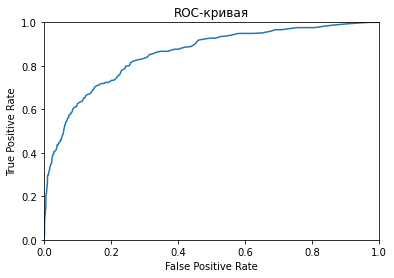

In [32]:
probabilities_test = model_upsample_forest.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]

fpr, tpr, thresholds = roc_curve(target_test, probabilities_one_test)

plt.figure()
plt.plot(fpr, tpr)
plt.xlim([0.0,1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show() 

In [33]:
auc_roc = roc_auc_score(target_test, probabilities_one_test)
print(f'AUC-ROC для тестовой выборки: {auc_roc}')

AUC-ROC для тестовой выборки: 0.8546467896696982


## **Вывод**

1. Подготовили данные:
 - заполнили пропуски
 - изменили тип данных
 - перевели категориальные признаки в дамми
 - масштабировали количественные признаки
2. Обучили модели до работы с дисбалансом классов. Определили, что самая эффективная в нашем случае "Случайный лес"
3. Провели работу с дисбалансом с помощью нескольких способов. Определили, что самый эффективный способ это увеличение выборки меньшего класса
4. Получили значение f1 выше 0.59
5. Построили кривую ROC и нашли значение AUC-ROC, которое равно 0.858. Оно не идеально, но явно больше, чем у случайной модели

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Выполнен шаг 1: данные подготовлены
- [x]  Выполнен шаг 2: задача исследована
    - [x]  Исследован баланс классов
    - [x]  Изучены модели без учёта дисбаланса
    - [x]  Написаны выводы по результатам исследования
- [x]  Выполнен шаг 3: учтён дисбаланс
    - [x]  Применено несколько способов борьбы с дисбалансом
    - [x]  Написаны выводы по результатам исследования
- [x]  Выполнен шаг 4: проведено тестирование
- [x]  Удалось достичь *F1*-меры не менее 0.59
- [x]  Исследована метрика *AUC-ROC*